In [1]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from sklearn import pipeline, grid_search

from sklearn.preprocessing import StandardScaler

from sklearn.lda import LDA
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier # Gini and Entropy
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import log_loss

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

C:\Anaconda3\lib\site-packages\sklearn\lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


** load data **

In [2]:
#python and pkg info
%load_ext watermark
%watermark --m -v -p numpy,pandas,scikit-learn,matplotlib

CPython 3.5.1
IPython 4.2.0

numpy 1.10.4
pandas 0.18.1
scikit-learn 0.17.1
matplotlib 1.5.1

compiler   : MSC v.1900 64 bit (AMD64)
system     : Windows
release    : 7
machine    : AMD64
processor  : Intel64 Family 6 Model 58 Stepping 9, GenuineIntel
CPU cores  : 4
interpreter: 64bit


In [3]:
x_train = pd.read_csv('x_train.csv')
y_train = pd.read_csv('y_train.csv').values
id_test = pd.read_csv('id_test.csv').values
x_test = pd.read_csv('x_test.csv')

In [3]:
#x_train = pd.read_csv('x_train_cal.csv')
#y_train = pd.read_csv('y_train_cal.csv').values
#id_test = pd.read_csv('id_test_cal.csv').values
#x_test = pd.read_csv('x_test_cal.csv')

In [4]:
ids = pd.read_csv(".\\dataset\\test.csv").Id.values

In [5]:
# check columns
x_train.columns

Index(['DayOfWeek', 'PdDistrict', 'X', 'Y', 'year', 'month', 'day', 'hour',
       'min', 'avg_moist', 'avg_prec', 'avg_temp', 'avg_wind', 'day_night',
       'min_30_abs', 'is_block', 'is_corner', 'is_av'],
      dtype='object')

In [6]:
pd.DataFrame(y_train)[0].value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

** Random Forest ** I Get memory error. I use it to see feature importance

In [ ]:
print("\nTraining Random Forest ....")
rfc = RandomForestClassifier(n_estimators = 30, n_jobs=-1, random_state=20, criterion='gini', class_weight='auto')
param_grid = {'min_samples_leaf': [5,10]}
rffc_gs = grid_search.GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 3, n_jobs=-1, error_score=0, verbose=2,scoring='log_loss') # 
rffc_gs.fit(x_train, y_train)
print("Best parameters found by grid search:", rffc_gs.best_params_)
print("Best CV score:", rffc_gs.best_score_)
print("Best CV score:", rffc_gs.grid_scores_)
print("Best CV score:", rffc_gs.scorer_)
# mean: -6.46254, std: 1.69189, params: {'min_samples_leaf': 10}

In [ ]:
probs_rf = rffc_gs.predict_proba(x_test)
predictions_rf  = rffc_gs.predict(x_test)

In [ ]:
h1 = plt.hist(y_train, bins= 33)
plt.title('Category_training')
plt.show()
plt.hist(predictions, bins=33)
plt.title('Category_predicted')
plt.show()

In [8]:
#Best parameters found by grid search: {n_estimators = 20,'min_samples_leaf': 5}
#Best CV3 score: 0.0495803764938
rfc = RandomForestClassifier(n_estimators = 5, n_jobs=-1, random_state=20, criterion='gini', class_weight='auto',min_samples_leaf=5)
rfc.fit(x_train, y_train)
#print(rfc.score(x_train, y_train))
features_lb = sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), x_train.columns), reverse=True, key=lambda pair: pair[0])
features_lb

[(0.13589999999999999, 'Y'),
 (0.1323, 'X'),
 (0.086599999999999996, 'day'),
 (0.0848, 'hour'),
 (0.0785, 'avg_temp'),
 (0.075499999999999998, 'avg_moist'),
 (0.068000000000000005, 'year'),
 (0.064799999999999996, 'avg_wind'),
 (0.056599999999999998, 'month'),
 (0.052900000000000003, 'DayOfWeek'),
 (0.047399999999999998, 'min'),
 (0.046199999999999998, 'min_30_abs'),
 (0.030800000000000001, 'PdDistrict'),
 (0.0229, 'avg_prec'),
 (0.0055999999999999999, 'day_night'),
 (0.0051000000000000004, 'is_block'),
 (0.0035000000000000001, 'is_corner'),
 (0.0027000000000000001, 'is_av')]

In [ ]:
# create summission
sub = pd.DataFrame(data=probs_rf_isotonic,columns=le_category.inverse_transform(abc_gs.classes_))
sub['Id'] = ids
sub.to_csv(".\submissions\\rf_submission_iso.csv",index=False)

** logistic regression ** work in progress NOT DONE!!

In [ ]:
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)
le_category = LabelEncoder()
y_train = le_category.fit_transform(y_train)
lrc = LogisticRegression(random_state=20,class_weight='auto',multi_class='ovr')
param_grid = {'C' : [1,0.5]}
model = grid_search.GridSearchCV(estimator = lrc, param_grid = param_grid, n_jobs = -1, cv = 4, verbose = 20)
model_fit = model.fit(x_train, y_train)
pipe_lrd = pipeline.Pipeline([('lda', LDA(n_components = 50)),('clf', lrc])
param_grid = {'rfr__min_samples_leaf' : [250,500],'rfr__subsample':[0.7],"rfr__learning_rate":[0.01,0.001]}
model = grid_search.GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs = -1, cv = 4, verbose = 20)
model_fit = model.fit(xtrain, ytrain)
pipe_lrd.fit(x_train_cv, y_train_cv)
#prob_lr_lda = pipe_lrd.predict_proba(x_test_cv)[:,1]
lg_lda_scores.append(roc_auc_score(y_test_cv,prob_lr_lda))

** Gradient Boosting **

In [34]:
print("\nTraining Gradient Boosting ....")
gbc = GradientBoostingClassifier(random_state=3, n_estimators = 15, max_features ='auto' )
param_grid = {'min_samples_leaf': [5,10],'learning_rate':[0.01],'subsample':[0.8]}
gbc_gs = grid_search.GridSearchCV(estimator = gbc, param_grid = param_grid, cv = 6, n_jobs=-1, error_score=0, verbose=2,scoring='log_loss') # 
gbc_gs_fit = gbc_gs.fit(x_train, y_train)
#Best parameters found by grid search: {'min_samples_leaf': 50, 'learning_rate': 0.01}
#Best CV score: 0.170917568382


Training Gradient Boosting ....
Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed: 77.7min finished


In [35]:
print("Best parameters found by grid search:", gbc_gs.best_params_)
print("Best CV score:", gbc_gs.best_score_)
print("All scores:",gbc_gs.grid_scores_)

Best parameters found by grid search: {'min_samples_leaf': 5, 'subsample': 0.8, 'learning_rate': 0.01}
Best CV score: -3.32281794219
All scores: [mean: -3.32282, std: 0.00030, params: {'min_samples_leaf': 5, 'subsample': 0.8, 'learning_rate': 0.01}, mean: -3.32283, std: 0.00030, params: {'min_samples_leaf': 50, 'subsample': 0.8, 'learning_rate': 0.01}, mean: -3.55839, std: 0.00003, params: {'min_samples_leaf': 5, 'subsample': 0.8, 'learning_rate': 0.001}, mean: -3.55840, std: 0.00003, params: {'min_samples_leaf': 50, 'subsample': 0.8, 'learning_rate': 0.001}]


In [ ]:
probs = gbc_gs.predict_proba(x_test)
predictions  = gbc_gs.predict(x_test)

In [ ]:
h1 = plt.hist(y_train, bins= 33)
plt.title('Category_training')
plt.show()
plt.hist(predictions, bins=33)
plt.title('Category_predicted')
plt.show()

In [ ]:
# create summission
sub = pd.DataFrame(data=probs,columns=le_category.inverse_transform(gbc.classes_))

** AdaBoost ** without calibration

In [8]:
# label encoder for decision trees
le_dow = LabelEncoder()
x_train['DayOfWeek'] = le_dow.fit_transform(x_train['DayOfWeek'])
le_pd = LabelEncoder()
x_train['PdDistrict'] = le_pd.fit_transform(x_train['PdDistrict'])
le_category = LabelEncoder()
y_train = le_category.fit_transform(y_train)
#test
x_test['DayOfWeek'] = le_dow.transform(x_test['DayOfWeek'])
x_test['PdDistrict'] = le_pd.transform(x_test['PdDistrict'])

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:125: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
print("\nTraining AdaBoostClassifier ....")
abc = AdaBoostClassifier(random_state=3)
param_grid = {'learning_rate': [0.01],'n_estimators':[2,5]}
abc_gs = grid_search.GridSearchCV(estimator = abc, param_grid = param_grid, cv = 6, n_jobs=-1, error_score=0, verbose=2,scoring='log_loss') # 
abc_gs_fit = abc_gs.fit(x_train, y_train)
print("Best parameters found by grid search:", abc_gs.best_params_)
print("Best CV score:", abc_gs.best_score_)
print("All scores:",abc_gs.grid_scores_)
# mean: -2.87001, std: 0.19207, params: {'n_estimators': 150, 'learning_rate': 0.01}
# 0.01 worst


Training AdaBoostClassifier ....
Fitting 6 folds for each of 2 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  13 out of  12 | elapsed:   19.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  12 | elapsed:   32.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  12 | elapsed:   35.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  12 | elapsed:   35.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  12 | elapsed:   36.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  12 | elapsed:   46.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  12 | elapsed:   48.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   48.1s finished


Best parameters found by grid search: {'n_estimators': 2, 'learning_rate': 0.01}
Best CV score: -2.62391572253
All scores: [mean: -2.62392, std: 0.00448, params: {'n_estimators': 2, 'learning_rate': 0.01}, mean: -2.62411, std: 0.00444, params: {'n_estimators': 5, 'learning_rate': 0.01}]


In [ ]:
# create summission for Adaboost
sub = pd.DataFrame(data=probs,columns=le_category.inverse_transform(rfc.classes_))
sub['Id'] = ids
sub.to_csv(".\submissions\\ab_submission.csv",index=False)

** AdaBoost with Calibration ** : Get train and validation set (for calibration). 

In [7]:
# label encoder for decision trees
le_dow = LabelEncoder()
x_train['DayOfWeek'] = le_dow.fit_transform(x_train['DayOfWeek'])
le_pd = LabelEncoder()
x_train['PdDistrict'] = le_pd.fit_transform(x_train['PdDistrict'])
le_category = LabelEncoder()
y_train = le_category.fit_transform(y_train)
#test
x_test['DayOfWeek'] = le_dow.transform(x_test['DayOfWeek'])
x_test['PdDistrict'] = le_pd.transform(x_test['PdDistrict'])

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:125: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
#divide into validation and training set to apply calibration to probs of ensambles ML (RF, etc)
X_train, X_validation, Y_train, Y_validation = train_test_split(x_train, y_train, test_size=0.25, random_state=1)
print(X_train.shape)
print(Y_train.shape)
print(X_validation.shape)
print(Y_validation.shape)

(658539, 18)
(658539,)
(219514, 18)
(219514,)


In [33]:
print("\nTraining AdaBoostClassifier ....")
abc = AdaBoostClassifier(random_state=3)
param_grid = {'learning_rate': [0.01],'n_estimators':[2,1]}
abc_gs = grid_search.GridSearchCV(estimator = abc, param_grid = param_grid, cv = 4, n_jobs=-1, error_score=0, verbose=2,scoring='log_loss') # 
abc_gs.fit(X_train, Y_train)
print("Best parameters found by grid search:", abc_gs.best_params_)
print("Best CV score:", abc_gs.best_score_)
print("All scores:",abc_gs.grid_scores_)
#mean: -2.62508, std: 0.00044, params: {'n_estimators': 50, 'learning_rate': 0.01}
# 0.001 worst


Training AdaBoostClassifier ....
Fitting 4 folds for each of 2 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   18.7s finished


Best parameters found by grid search: {'n_estimators': 1, 'learning_rate': 0.01}
Best CV score: -2.62267137675
All scores: [mean: -2.62268, std: 0.00086, params: {'n_estimators': 2, 'learning_rate': 0.01}, mean: -2.62267, std: 0.00087, params: {'n_estimators': 1, 'learning_rate': 0.01}]


In [12]:
#Calibrate probs isotonic
abc = AdaBoostClassifier(random_state=3,learning_rate = 0.01,n_estimators=50)
abc.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.01, n_estimators=50, random_state=3)

In [13]:
ab_isotonic = CalibratedClassifierCV(abc, cv=2, method='isotonic')
ab_isotonic.fit(X_validation, Y_validation)

CalibratedClassifierCV(base_estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.01, n_estimators=50, random_state=3),
            cv=2, method='isotonic')

In [14]:
#Calibrate probs sigmoid
ab_sigmoid = CalibratedClassifierCV(abc, cv=2, method='sigmoid')
ab_sigmoid.fit(X_validation, Y_validation)

CalibratedClassifierCV(base_estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.01, n_estimators=50, random_state=3),
            cv=2, method='sigmoid')

In [15]:
probs_ab_isotonic = ab_isotonic.predict_proba(x_test)

In [16]:
probs_ab_sigmoid = ab_sigmoid.predict_proba(x_test)

In [19]:
probs = abc.predict_proba(x_test)

In [18]:
print(probs[9])
print(probs_ab_isotonic[9])
print(probs_ab_sigmoid[9])

[  2.64760508e-03   8.84989923e-02   3.58717776e-04   6.08417277e-04
   2.26714546e-02   7.73899942e-03   5.57753680e-03   8.19550367e-02
   8.34890985e-03   1.10633805e-03   4.31866159e-04   8.44961523e-04
   1.03323420e-02   1.67459869e-02   3.38054757e-04   3.35216311e-03
   1.54532958e-01   4.12515890e-03   2.97435796e-03   2.15260930e-02
   9.57191833e-02   1.67929566e-01   4.74725821e-05   1.53688339e-02
   5.56382796e-03   3.59457835e-02   1.88173150e-03   1.29388510e-02
   5.44496843e-03   2.26231504e-04   7.86417285e-03   7.51306970e-04
   3.74041772e-02   6.28099931e-07   9.37916184e-03   4.42469937e-02
   4.53264809e-02   6.44294879e-02   1.48151899e-02]
[  1.32056020e-03   8.42974774e-02   1.55873007e-04   1.84718720e-04
   1.37992167e-03   6.03040066e-03   3.49010218e-03   1.04428639e-01
   5.10053466e-03   2.66384170e-05   1.86199418e-04   3.27472576e-04
   7.59671899e-03   2.26316871e-02   4.49598020e-05   2.71409976e-03
   1.45758387e-01   1.70758387e-03   1.32871991e-0

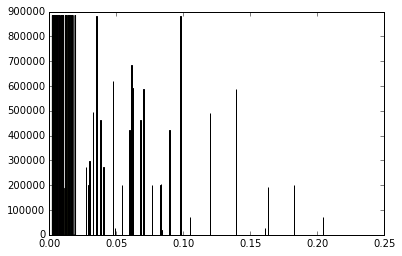

In [29]:
plt.hist(probs)
plt.show()

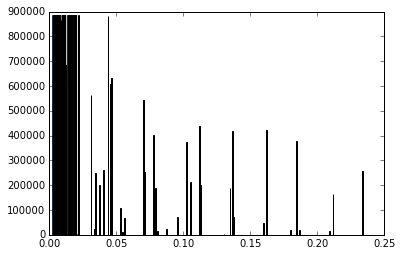

In [28]:
plt.hist(probs_ab_isotonic)
plt.show()

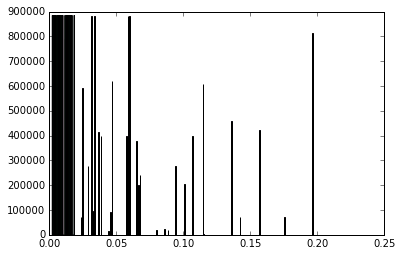

In [30]:
plt.hist(probs_ab_sigmoid)
plt.show()

In [20]:
# create summission for Adaboost
sub = pd.DataFrame(data=probs,columns=le_category.inverse_transform(rfc.classes_))
sub['Id'] = ids
sub.to_csv(".\submissions\\ab_submission.csv",index=False)

In [21]:
# create summission for Adaboost iso
sub1 = pd.DataFrame(data=probs_ab_isotonic,columns=le_category.inverse_transform(rfc.classes_))
sub1['Id'] = ids
sub1.to_csv(".\submissions\\ab_iso_submission.csv",index=False)

In [22]:
# create summission for Adaboost sig
sub2 = pd.DataFrame(data=probs_ab_sigmoid,columns=le_category.inverse_transform(rfc.classes_))
sub2['Id'] = ids
sub2.to_csv(".\submissions\\ab_sig_submission.csv",index=False)

** KNN **

In [8]:
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)
le_category = LabelEncoder()
y_train = le_category.fit_transform(y_train)

Index(['X', 'Y', 'year', 'month', 'day', 'hour', 'min', 'avg_moist',
       'avg_prec', 'avg_temp', 'avg_wind', 'day_night', 'min_30_abs',
       'is_block', 'is_corner', 'is_av', 'DayOfWeek_Friday',
       'DayOfWeek_Monday', 'DayOfWeek_Saturday', 'DayOfWeek_Sunday',
       'DayOfWeek_Thursday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday',
       'PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL', 'PdDistrict_INGLESIDE',
       'PdDistrict_MISSION', 'PdDistrict_NORTHERN', 'PdDistrict_PARK',
       'PdDistrict_RICHMOND', 'PdDistrict_SOUTHERN', 'PdDistrict_TARAVAL',
       'PdDistrict_TENDERLOIN'],
      dtype='object')

In [7]:
#KNeighborsClassifier
print("\nKNeighborsClassifier ....")
knn = KNeighborsClassifier(n_jobs=-1)
param_grid = {'n_neighbors': [50,100]}
knn_gs = grid_search.GridSearchCV(estimator = knn, param_grid = param_grid, cv = 6, n_jobs=-1, error_score=0, verbose=2,scoring='log_loss') # 
knn_gs_fit = knn_gs.fit(x_train, y_train)
print("Best parameters found by grid search:", knn_gs.best_params_)
print("Best CV score:", knn_gs.best_score_)
print("All scores:",knn_gs.grid_scores_)


KNeighborsClassifier ....
Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  13 out of  12 | elapsed:  6.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  12 | elapsed:  6.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  12 | elapsed:  9.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  12 | elapsed:  9.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  12 | elapsed:  9.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  12 | elapsed:  9.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  12 | elapsed: 10.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 10.8min finished


Best parameters found by grid search: {'n_neighbors': 10}
Best CV score: -20.5048105107
All scores: [mean: -28.48319, std: 1.91871, params: {'n_neighbors': 3}, mean: -25.65890, std: 1.98796, params: {'n_neighbors': 5}, mean: -20.50481, std: 1.64441, params: {'n_neighbors': 10}]


** SVM **